In [18]:
import matplotlib.pyplot as plt
import sys
from glob import glob
from matplotlib import cm
import matplotlib.colors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
import seaborn as sns
import DNSmodule as dns
from scipy.optimize import curve_fit

#params = {'legend.fontsize':'13','axes.labelsize':'23','xtick.labelsize':'20','ytick.labelsize':'20'} # large#
params = {'legend.fontsize':'15','axes.labelsize':'27','xtick.labelsize':'25','ytick.labelsize':'25'} # mid
#params = {'legend.fontsize':'25','axes.labelsize':'38','xtick.labelsize':'33','ytick.labelsize':'33'} # small 

plt.rcParams.update(params)
plt.rc('text',usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amssymb}')
plt.rc('font',family='serif')
#cols = ['#df1e36','#e62f44','#c9c900','#113f7e','#091f3f']
colours = ['#df1e36','#c9c900','#091f3f']
cols = ['#df1e36','#c9c900','#091f3f']
red  = cols[0]
yel  = cols[1]
blue = cols[2]

In [4]:
col_rock = sns.color_palette('rocket',11)[7]
col_mako = sns.color_palette('mako',11)[1]

nonhelical
Pm = 0.03125 	 p = 2.81 	 q = 0.42
Pm = 0.03125 	 pk = 2.26 	 qk = 0.46
Pm = 0.0625 	 p = 2.79 	 q = 0.51
Pm = 0.0625 	 pk = 2.26 	 qk = 0.46
Pm = 0.125 	 p = 2.74 	 q = 0.52
Pm = 0.125 	 pk = 2.26 	 qk = 0.46
Pm = 0.25 	 p = 2.50 	 q = 0.47
Pm = 0.25 	 pk = 2.22 	 qk = 0.46
Pm = 0.5 	 p = 2.40 	 q = 0.50
Pm = 0.5 	 pk = 2.20 	 qk = 0.45
Pm = 1.0 	 p = 2.24 	 q = 0.45
Pm = 1.0 	 pk = 2.16 	 qk = 0.45
Pm = 2.0 	 p = 1.96 	 q = 0.43
Pm = 2.0 	 pk = 2.09 	 qk = 0.46
Pm = 4.0 	 p = 1.78 	 q = 0.40
Pm = 4.0 	 pk = 1.95 	 qk = 0.47
Pm = 8.0 	 p = 1.57 	 q = 0.38
Pm = 8.0 	 pk = 1.73 	 qk = 0.46
Pm = 16.0 	 p = 1.38 	 q = 0.36
Pm = 16.0 	 pk = 1.52 	 qk = 0.42
Pm = 32.0 	 p = 1.21 	 q = 0.35
Pm = 32.0 	 pk = 1.40 	 qk = 0.38
helical
Pm = 0.03125 	 p = 2.81 	 q = 0.41
Pm = 0.03125 	 pk = 2.26 	 qk = 0.46
Pm = 0.0625 	 p = 2.80 	 q = 0.51
Pm = 0.0625 	 pk = 2.26 	 qk = 0.46
Pm = 0.125 	 p = 2.76 	 q = 0.48
Pm = 0.125 	 pk = 2.22 	 qk = 0.46
Pm = 0.25 	 p = 2.58 	 q = 0.47
Pm = 0.25 	

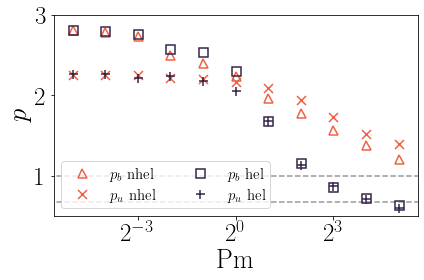

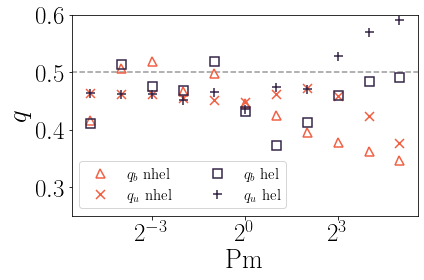

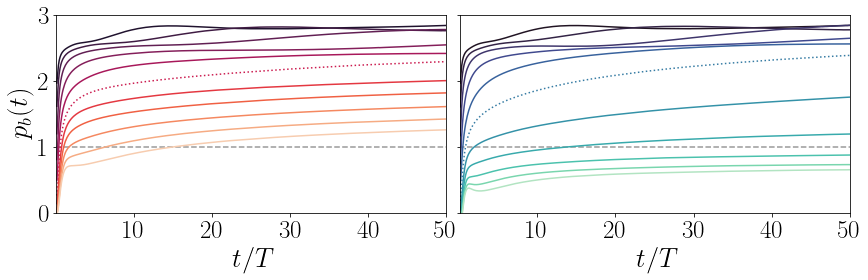

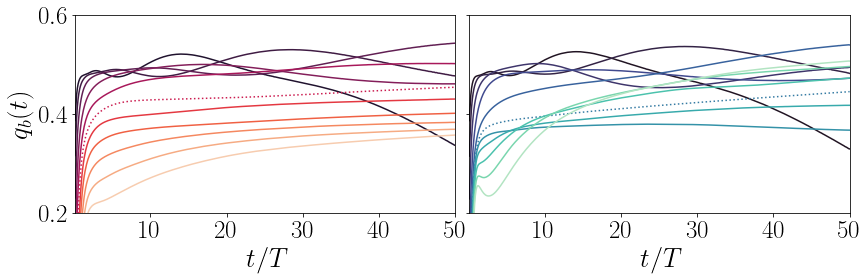

In [6]:
#plt.style.use('ggplot')

figp, axp = plt.subplots()
figq, axq = plt.subplots()
fign, [axn0,axn1] = plt.subplots(1,2,sharey=True,figsize=(12,4))
figl, [axl0,axl1] = plt.subplots(1,2,sharey=True,figsize=(12,4))

ti = 300
tf = -1

f_NH = glob('NH_v0.005/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)
pn = []
qn = []
pkn = []
qkn = []

col_NH = sns.color_palette('rocket',len(f_NH))
print('nonhelical')


for idx, f in enumerate(f_NH):

    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]

    time = times[idx]
    nn = - np.gradient(np.log(B[1:]),np.log(time[1:]))
    ln =  np.gradient(np.log(Lb[1:]),np.log(time[1:]))
    E = Es[idx]
    Lu = Lus[idx]
    ls= ':' if Pm ==1 else '-'
    tag = 'nhel' if idx==0 else '__nolegend__'
    axn0.plot(time[1:]/0.1,nn,color=col_NH[idx],ls=ls) 
    axl0.plot(time[1:]/0.1,ln,color=col_NH[idx],ls=ls) 
        
    k = ks[idx]
    mp, bp = np.polyfit(np.log(time[ti:tf]), np.log(B[ti:tf]), 1)
    pn.append(mp)
    mq, bq = np.polyfit(np.log(time[ti:tf]), np.log(Lb[ti:tf]), 1)
    qn.append(mq)
    print('Pm = {} \t p = {:.2f} \t q = {:.2f}'.format(Pm,-mp,mq))
    mp, bp = np.polyfit(np.log(time[ti:tf]), np.log(E[ti:tf]), 1)
    pkn.append(mp)
    mq, bq = np.polyfit(np.log(time[ti:tf]), np.log(Lu[ti:tf]), 1)
    qkn.append(mq)
    print('Pm = {} \t pk = {:.2f} \t qk = {:.2f}'.format(Pm,-mp,mq))
    

pn = np.array(pn)
qn = np.array(qn)
pkn = np.array(pkn)
qkn = np.array(qkn)

poptNH,pcovNH = curve_fit(dns.fit_complete,Pms[-6:],-pn[-6:])

x_Pms = np.linspace(1/48,48,1000)

#axp.plot(x_Pms, dns.fit_complete(x_Pms,poptNH[0],poptNH[1],poptNH[2]),color=col_rock,ls='--')

axp.plot(Pms, -pn,marker = '^',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col_NH[7],label='{:<}    {:>}'.format('$p_b$', 'nhel'))
axq.plot(Pms, qn,marker = '^',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col_NH[7],label = '{:<}    {:>}'.format('$q_b$','nhel'))
axp.plot(Pms, -pkn,marker = 'x',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col_NH[7],label='{:<}    {:>}'.format('$p_u$', 'nhel'))
axq.plot(Pms, qkn,marker = 'x',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col_NH[7],label = '{:<}    {:>}'.format('$q_u$','nhel'))



f_H = glob('H_v0.005/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_H)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H, idx_sort)
ph = []
qh = []
pkh = []
qkh = []
col_H = sns.color_palette('mako',len(f_H))
print('helical')
for idx, f in enumerate(f_H):
 
    Bk = Bks[idx]
    Pm = Pms[idx]
    B = Bs[idx]
    Lb = Lbs[idx]
    time = times[idx]
    k = ks[idx]
    
    nh = - np.gradient(np.log(B[1:]),np.log(time[1:]))
    lh =  np.gradient(np.log(Lb[1:]),np.log(time[1:]))
   # tag = 'hel' if idx==7 else '__nolegend__'
    ls = ':' if Pm ==1 else '-'
    axn1.plot(time[1:]/0.1,nh,color=col_H[idx],ls=ls) 
    axl1.plot(time[1:]/0.1,lh,color=col_H[idx],ls=ls)
    E = Es[idx]
    Lu = Lus[idx]
    
    mp, bp = np.polyfit(np.log(time[ti:tf]), np.log(B[ti:tf]), 1)
    ph.append(mp)
    mq, bq = np.polyfit(np.log(time[ti:tf]), np.log(Lb[ti:tf]), 1)
    qh.append(mq)
    print('Pm = {} \t p = {:.2f} \t q = {:.2f}'.format(Pm,-mp,mq))
    mp, bp = np.polyfit(np.log(time[ti:tf]), np.log(E[ti:tf]), 1)
    pkh.append(mp)
    mq, bq = np.polyfit(np.log(time[ti:tf]), np.log(Lu[ti:tf]), 1)
    qkh.append(mq)
    print('Pm = {} \t pk = {:.2f} \t qk = {:.2f}'.format(Pm,-mp,mq))

ph = np.array(ph)
qh = np.array(qh)
pkh = np.array(pkh)
qkh = np.array(qkh)

poptH,pcovH = curve_fit(dns.fit,Pms[-6:],-ph[-6:])
#axp.plot(x_Pms, dns.fit(x_Pms,poptH[0],poptH[1]),color=col_mako,ls='--')


axp.plot(Pms, -ph,marker = 's',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col_mako,label='{:<}    {:>}'.format('$p_b$', 'hel'))
axq.plot(Pms, qh,marker = 's',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col_mako,label = '{:<}    {:>}'.format('$q_b$','hel'))
axp.plot(Pms, -pkh,marker = '+',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col_mako,label='{:<}    {:>}'.format('$p_u$', 'hel'))
axq.plot(Pms, qkh,marker = '+',linestyle='None',markersize = 9,markeredgewidth = 1.5,markerfacecolor='None',markeredgecolor = col_mako,label = '{:<}    {:>}'.format('$q_u$','hel'))


axp.set_xscale('log',basex=2)
axp.set_ylabel('$p$')
axp.set_xlabel('Pm')
axp.legend(ncol=2)

axp.hlines([1,2/3],1e-4,1e3,linestyles = '--',colors = '0.6')
axp.set_xlim(1/48,48)
axp.set_ylim(0.5,3)
figp.tight_layout()
figp.savefig('p_vs_Pm_thesis.pdf',format='pdf')


axq.set_xscale('log',basex=2)
axq.set_ylabel('$q$')
axq.set_xlabel('Pm')
axq.legend(ncol=2,loc=3)
axq.hlines(0.5,1e-4,1e3,linestyles = '--',colors = '0.6')
axq.set_xlim(1/48,48)
axq.set_ylim(0.25,0.6)
figq.tight_layout()
figq.savefig('q_vs_Pm_thesis.pdf',format='pdf')



axn0.set_ylabel('$p_b(t)$')
axn0.set_xlabel('$t/T$')
axn0.hlines(1,0,1e3,linestyles = '--',colors = '0.6')
axn0.set_xlim(5e-2,50)
axn0.set_ylim(0,3)


axn1.set_xlabel('$t/T$')
axn1.hlines(1,0,1e3,linestyles = '--',colors = '0.6')
axn1.set_xlim(1e-1,50)
axn1.set_ylim(0,3)

fign.tight_layout()
fign.savefig('p_vs_t_varying_Pm_thesis.pdf', format='pdf')

#axn.set_xscale('',basex=2)
axl0.set_ylabel('$q_b(t)$')
axl0.set_xlabel('$t/T$')

axl0.hlines(1,0,1e3,linestyles = '--',colors = '0.6')
axl0.set_xlim(5e-2,50)
axl0.set_ylim(0.2,0.6)



axl1.set_xlabel('$t/T$')

axl1.hlines(1,0,1e3,linestyles = '--',colors = '0.6')
axl1.set_xlim(1e-1,50)
axl1.set_ylim(0.2,0.6)

figl.tight_layout()
figl.savefig('q_vs_t_varying_Pm_thesis.pdf', format='pdf')

plt.show()

[1.   1.25 1.5  1.75 2.  ]


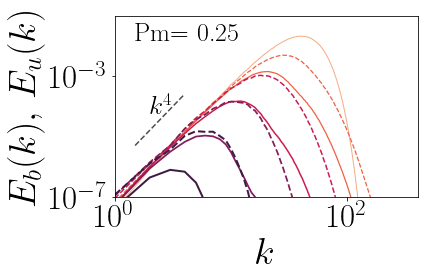

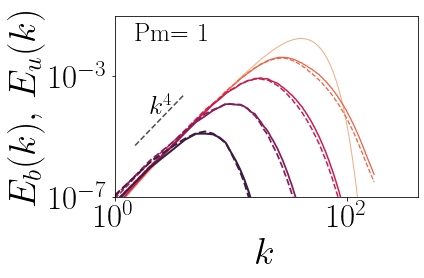

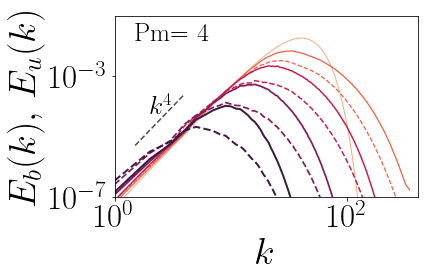

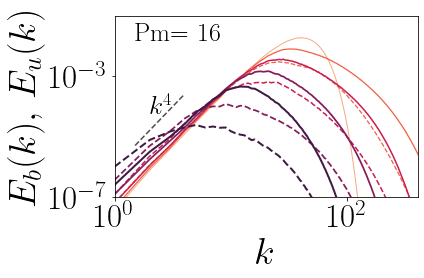

In [16]:
f_NH = glob('NH_v0.005/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)


Pmss = ['_0.25.','_1.','_4.','_16.']
t = [0,8,32,128,481]
lws = np.linspace(1,2,len(t))
print(lws)
#plt.style.use('ggplot')

col_NH = sns.color_palette('rocket',len(t))
col_NH.reverse()
t_T = []

for idx, f in enumerate(f_NH):
    for Prm in Pmss:
        if Prm in f:
            #print(f)
            fig, ax = plt.subplots()
            Bk = Bks[idx]
            Ek = Eks[idx]
            Pm = Pms[idx]
            T = Tus[idx][0]
            
            B = Bs[idx]
            Lb = Lbs[idx]
            time = times[idx]
            k = ks[idx]

            for id_t,idx_t in enumerate(t):
                if idx_t == 0:
                    ax.plot(k,Bk[idx_t],c=col_NH[id_t],lw=lws[id_t],ls='-',label ='__nolegend__')
                    
                else:
                    ax.plot(k,Bk[idx_t],c=col_NH[id_t], lw = lws[id_t])
                    ax.plot(k,Ek[idx_t],c=col_NH[id_t], ls = '--', lw = lws[id_t])
                    t_T.append(idx_t*0.01/T)
            
            k_slope = np.array([1.5,4])
            ax.plot(k_slope,1e-6*np.power(k_slope,4),c='0.3',ls='--')
            
            ax.text(2,6e-5,'$k^{4}$',size=26)
            Pm = int(Pm) if Pm.is_integer() else Pm        
            ax.text(1.5,1.5e-2,'Pm= {}'.format(Pm),size=26)
            ax.set_yscale('log')
            ax.set_xscale('log')
            ax.set_ylabel('$E_b(k), \, E_u(k)$')
            ax.set_xlabel('$k$')
           
            ax.set_ylim(1e-7,1e-1)
            ax.set_xlim(1,400)
            
            fig.tight_layout()
            fig.savefig('Eb_nhel_{}_thesis.pdf'.format(Pm),format='pdf')


[1.   1.25 1.5  1.75 2.  ]
H_v0.005/hc.b_512_0.005_0.25.spc
H_v0.005/hd.b_512_0.005_1.spc
H_v0.005/he.b_1024_0.005_4.spc
H_v0.005/hg.b_2048_0.005_16.spc


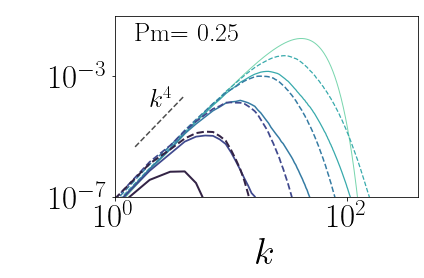

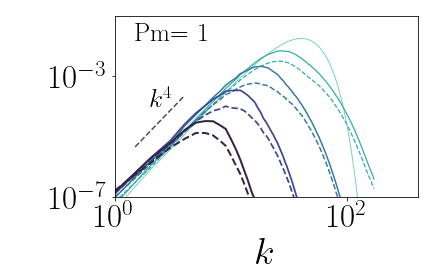

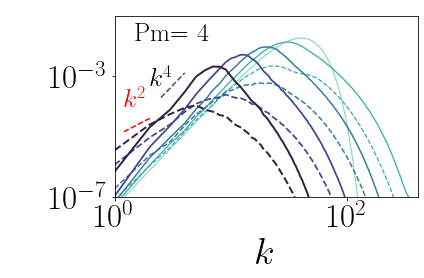

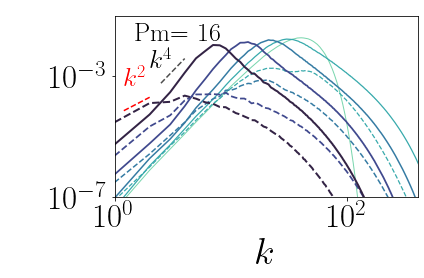

In [17]:
f_H = glob('H_v0.005/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_H)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H, idx_sort)


Pmss = ['_0.25.','_1.','_4.','_16.']
t = [0,8,32,128,481] 
lws = np.linspace(1,2,len(t))
print(lws)
#plt.style.use('ggplot')

col_H = sns.color_palette('mako',len(t))
col_H.reverse()
t_T = []

for idx, f in enumerate(f_H):
    for Prm in Pmss:
        if Prm in f:
            print(f)
            fig, ax = plt.subplots()
            Bk = Bks[idx]
            Ek = Eks[idx]
            Pm = Pms[idx]
            T = Tus[idx][0]
            t_T.append(t/T)
            B = Bs[idx]
            Lb = Lbs[idx]
            time = times[idx]
            k = ks[idx]


            for id_t,idx_t in enumerate(t):
                if idx_t == 0:
                    ax.plot(k,Bk[idx_t],c=col_H[id_t],lw=lws[id_t],ls='-',label ='__nolegend__')
                else:
                    ax.plot(k,Bk[idx_t],c=col_H[id_t], lw = lws[id_t])
                    ax.plot(k,Ek[idx_t],c=col_H[id_t], ls='--', lw = lws[id_t])
            k_slope = np.array([1.5,4])
            k_slope1 = np.array([2.5,4])
            k_slope2 = np.array([1.2,2])
           
            if Pm == 4.0:
                ax.plot(k_slope2,1e-5*np.power(k_slope2,2),c='r',ls='--')
                ax.text(1.2,1e-4,'$k^{2}$',size=26,color='r')
                ax.plot(k_slope1,0.5e-5*np.power(k_slope1,4),c='0.3',ls='--')
                ax.text(2,0.5e-3,'$k^{4}$',size=26)
            elif Pm == 16.0:
                ax.plot(k_slope2,5e-5*np.power(k_slope2,2),c='r',ls='--')
                ax.text(1.2,5e-4,'$k^{2}$',size=26,color='r')
                ax.plot(k_slope1,1.5e-5*np.power(k_slope1,4),c='0.3',ls='--')
                ax.text(2,2e-3,'$k^{4}$',size=26)
            else:
                ax.plot(k_slope,9e-7*np.power(k_slope,4),c='0.3',ls='--')
                ax.text(2,1e-4,'$k^{4}$',size=26)
            Pm = int(Pm) if Pm.is_integer() else Pm        
            ax.text(1.5,1.5e-2,'Pm= {}'.format(Pm),size=26)
            #k_slope = np.array([40.0,100.0])
            #ax.plot(k_slope,5e-2*np.power(k_slope,-2),c='0.3',ls='--')
            ax.set_yscale('log')
            ax.set_xscale('log')
            ax.set_ylabel('$E_b(k),\, E_u(k)$',color='white')
            ax.set_xlabel('$k$')

            
            ax.set_ylim(1e-7,1e-1)
            ax.set_xlim(1,400)
          
            fig.tight_layout()
            fig.savefig('Eb_hel_{}_thesis.pdf'.format(Pm),format='pdf')


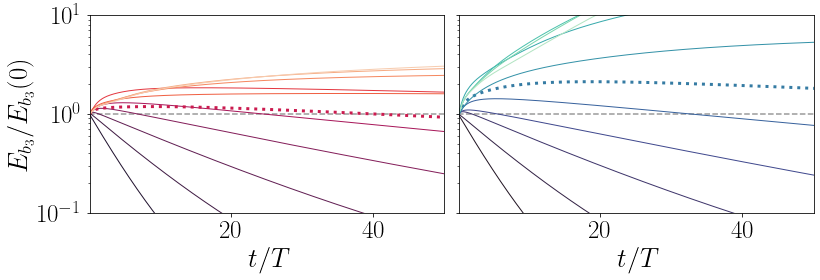

In [19]:
f_H = glob('H_v0.005/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_H)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H, idx_sort)

#plt.style.use('ggplot')

figE, [axE0,axE1] = plt.subplots(1,2,figsize=(11.5,4),sharey=True)

col_H = sns.color_palette('mako',len(f_H))

for id_f,f in enumerate(f_H):
    B    = Bs[id_f]
    Bk = Bks[id_f]
    T = Tus[id_f]
    time = times[id_f]
    Pm = Pms[id_f]
    k = ks[id_f]
    int(Pm) if Pm.is_integer() else Pm
    B3 = dns.integrate(Bk,0,3,k)
    axE1.plot(time[:-1]/T[0], B3/B3[0], color=col_H[id_f],ls=(':' if Pm==1 else '-'), lw=(3 if Pm==1 else 1),label = 'Pm = {}'.format(Pm))

    
    
    
    
f_NH = glob('NH_v0.005/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)
col_NH = sns.color_palette('rocket',len(f_NH))
for id_f,f in enumerate(f_NH):
    B    = Bs[id_f]
    Bk = Bks[id_f]
    T = Tus[id_f]
    time = times[id_f]
    Pm = Pms[id_f]
    k = ks[id_f]
    int(Pm) if Pm.is_integer() else Pm
    B3 = dns.integrate(Bk,0,3,k)
    axE0.plot(time[:-1]/T[0], B3/B3[0], color=col_NH[id_f], ls=(':' if Pm==1 else '-'),lw=(3 if Pm==1 else 1),label = 'Pm = {}'.format(Pm))


#axE.set_xscale('log')
axE0.set_yscale('log')
axE0.set_ylabel('$E_{b_3}/E_{b_3}(0)$')
axE0.set_xlabel('$t/T$')

axE0.hlines(1,0,1e3,linestyles = '--',colors = '0.6')
axE0.set_xlim(1e-1,50)
axE0.set_ylim(1e-1,1e1)



axE1.set_yscale('log')

axE1.set_xlabel('$t/T$')

axE1.hlines(1,0,1e3,linestyles = '--',colors = '0.6')
axE1.set_xlim(1e-1,50)
axE1.set_ylim(1e-1,1e1)



figE.tight_layout()
figE.savefig('E3_vs_t_thesis.pdf',format='pdf')

plt.show()

[1.         1.33333333 1.66666667 2.        ]
H_v0.005/hb.b_512_0.005_0.0625.spc
H_v0.005/hd.b_512_0.005_1.spc
H_v0.005/hf.b_2048_0.005_8.spc
H_v0.005/hh.b_2048_0.005_32.spc


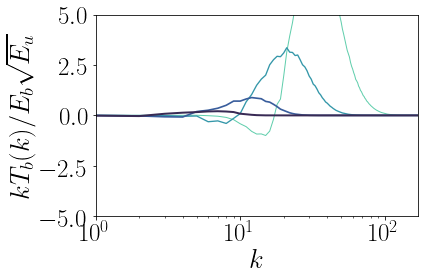

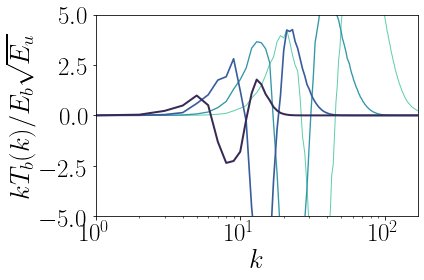

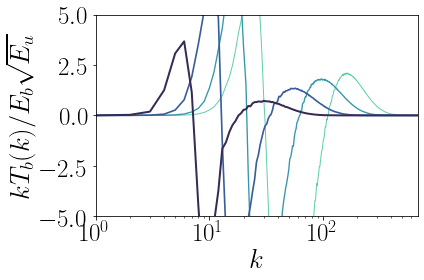

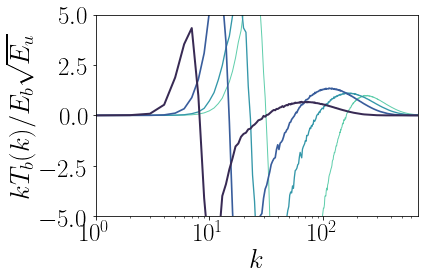

In [20]:

f_H = glob('H_v0.005/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_H)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs, epsus, epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H, idx_sort)
Tubks = []
Tbks = []

for id_f, f in enumerate(f_H):
    
    Tbks.append(dns.Tb_spectrum(f))

Pmss = ['_0.0625.','_1.','_8.','_32.']
t = [8,32,128,481]
lws = np.linspace(1,2,len(t))

col_H = sns.color_palette('mako',len(t))
col_H.reverse()
t_T = []

for idx, f in enumerate(f_H):
    for Prm in Pmss:
        if Prm in f:
            print(f)
            fig, ax = plt.subplots()
         
            Pm = Pms[idx]
            E = Es[idx]
            T = Tus[idx][0]
            Tbk = Tbks[idx]
            B = Bs[idx]
            Lb = Lbs[idx]
            time = times[idx]
            k = ks[idx]

            for id_t,idx_t in enumerate(t):
                if idx_t == 0:
                    ax.plot(k,Tbk[idx_t]*k/(B[idx_t]*E[idx_t]**0.5),c=col_H[id_t],lw=lws[id_t],ls='-',label ='__nolegend__')
                    
                else:
                    ax.plot(k,Tbk[idx_t]*k/(B[idx_t]*E[idx_t]**0.5),c=col_H[id_t], lw = lws[id_t])
                   
                    t_T.append(idx_t*0.01/T)
            
       
            Pm = int(Pm) if Pm.is_integer() else Pm        
          
            ax.set_xscale('log')
            ax.set_ylabel('$k T_{b}(k)/E_b\sqrt{E_u}$')
            ax.set_xlabel('$k$')
            ax.set_ylim(-5,5)
            ax.set_xlim(1,k.max())
         
            fig.tight_layout()
            fig.savefig('Tb_hel_{}_thesis.pdf'.format(Pm),format='pdf')


NH_v0.005/nhb.b_512_0.005_0.0625.spc
NH_v0.005/nhd.b_512_0.005_1.spc
NH_v0.005/nhf.b_2048_0.005_8.spc
NH_v0.005/nhh.b_2048_0.005_32.spc


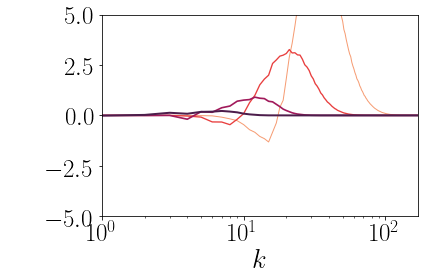

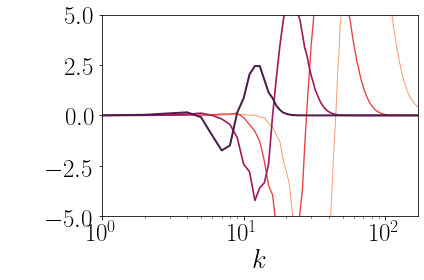

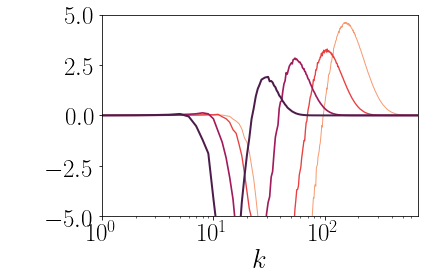

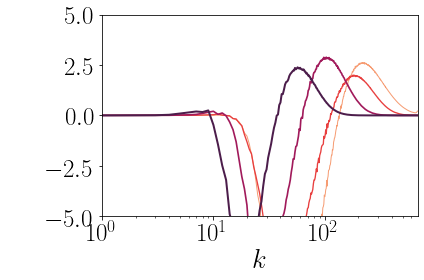

In [21]:
f_NH = glob('NH_v0.005/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs, epsus, epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)
Tubks = []
Tbks = []

for id_f, f in enumerate(f_NH):
    
    Tbks.append(dns.Tb_spectrum(f))

Pmss = ['_0.0625.','_1.','_8.','_32.']
t = [8,32,128,481]
lws = np.linspace(1,2,len(t))

col_NH = sns.color_palette('rocket',len(t))
col_NH.reverse()


for idx, f in enumerate(f_NH):
    for Prm in Pmss:
        if Prm in f:
            print(f)
            fig, ax = plt.subplots()
         
            Pm = Pms[idx]
            E = Es[idx]
            T = Tus[idx][0]
            Tbk = Tbks[idx]
            B = Bs[idx]
            Lb = Lbs[idx]
            time = times[idx]
            k = ks[idx]
            t_T = []
            for id_t,idx_t in enumerate(t):
                if idx_t == 0:
                    ax.plot(k,Tbk[idx_t]*k/(B[idx_t]*E[idx_t]**0.5),c=col_NH[id_t],lw=lws[id_t],ls='-',label ='__nolegend__')
                    
                else:
                    ax.plot(k,Tbk[idx_t]*k/(B[idx_t]*E[idx_t]**0.5),c=col_NH[id_t], lw = lws[id_t])
                   
                    t_T.append(idx_t*0.01/T)
            
         
            Pm = int(Pm) if Pm.is_integer() else Pm        

            ax.set_xscale('log')
            ax.set_ylabel('$k T_{ub}(k)/E_u^{1/2}E_b$',color='white')
            ax.set_xlabel('$k$')
            ax.set_ylim(-5,5)
            ax.set_xlim(1,k.max())
            fig.tight_layout()
            fig.savefig('Tb_nhel_{}_thesis.pdf'.format(Pm),format='pdf')

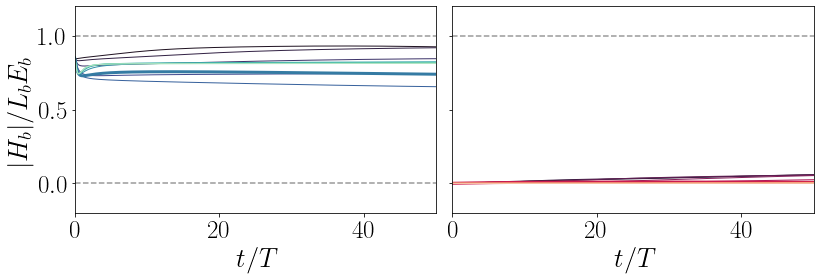

In [22]:

#plt.style.use('ggplot')

figE, [axEh,axEnh] = plt.subplots(1,2,sharex=True,sharey=True,figsize=(11.5,4))
col_H = sns.color_palette('mako',len(f_H))


f_H = glob('H_v0.005/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_H)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_H, idx_sort)

for id_f,f in enumerate(f_H):
    B    = Bs[id_f]
    Lb   = Lbs[id_f]
    Lu   = Lus[id_f]
    lb = lbs[id_f]
    epsu = epsus[id_f]
    epsb = epsbs[id_f]
    T = Tus[id_f]
    #print('To = {:.2f}'.format(T[0]))
    E = Es[id_f]
    Hm = dns.col_Hm(f)
    time = times[id_f]
    Pm = Pms[id_f]
    int(Pm) if Pm.is_integer() else Pm
    
    axEh.plot(time/T[0], np.absolute(Hm)/(B*Lb), color=col_H[id_f],lw=(3 if Pm==1 else 1),ls='-', label = 'Pm = {}'.format(Pm))

f_NH = glob('NH_v0.005/*.b*.spc')
ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps = dns.get_data_MHD(f_NH)
idx_sort = np.argsort(Pms)
ks, Eks, Bks, Bks, times, Es, Bs, Us, Vas, Lus, Lbs, Tus, Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH = dns.arg_sort_MHD(ks,Eks,Bks,times,Es,Bs,Us,Vas,Lus,Lbs,Tus,Tbs,epsus,epsbs, lus, lbs, viscs, Pms, Ns, kps, f_NH, idx_sort)
col_NH = sns.color_palette('rocket',len(f_NH))
for id_f,f in enumerate(f_NH):
    B    = Bs[id_f]
    Lb   = Lbs[id_f]
    Lu   = Lus[id_f]
    lb = lbs[id_f]
    epsu = epsus[id_f]
    epsb = epsbs[id_f]
    T = Tus[id_f]
    Hm = dns.col_Hm(f)
    #print('To = {:.2f}'.format(T[0]))
    E = Es[id_f]
    time = times[id_f]
    Pm = Pms[id_f]
    int(Pm) if Pm.is_integer() else Pm
    
    axEnh.plot(time/0.1, np.absolute(Hm)/(B*Lb), color=col_NH[id_f], lw=(3 if Pm==1 else 1),ls='-', label = 'Pm = {}'.format(Pm))
    


axEh.set_ylabel('$|H_b|/L_b E_b$')
axEh.set_xlabel('$t/T$')

axEh.hlines([0,1],1e-4,1e3,linestyles = '--',colors = '0.6')





axEnh.set_xlabel('$t/T$')

axEnh.hlines([0,1],1e-4,1e3,linestyles = '--',colors = '0.6')
axEnh.set_xlim(0,50)
axEnh.set_ylim(-0.2,1.2)


figE.tight_layout()
figE.savefig('Hb_vs_t_thesis.pdf',format='pdf')

plt.show()